In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from typing import TypedDict

In [2]:
load_dotenv()

model = ChatGoogleGenerativeAI(model='gemini-2.5-pro')

In [3]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    

In [5]:
def create_outline(state:BlogState)->BlogState:
    #fetch title
    title = state['title']   
    
    #call LLM gen outline
    prompt = f'Generate a detailed  outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    #update state
    state['outline'] = outline

    return state

In [6]:
def create_blog(state:BlogState)->BlogState:
    title = state['title']
    outline = state['outline']

    prompt = f'write a detailed blog on the title - {title} using the following outline - {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [8]:
graph = StateGraph(BlogState)

#nodes
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)

#edges
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog',END)

#compile
workflow = graph.compile()


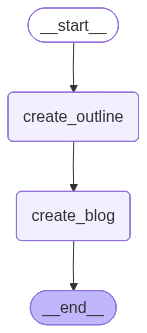

In [9]:
#to visualize the  updated graph use 
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [10]:
initial_state = {'title':'agentic ai as evolving feild'}
final_state=workflow.invoke(initial_state)
print(final_state['content'])

Of course! Here is a detailed blog post written based on the provided outline.

---

### **Beyond the Prompt: Meet Agentic AI, The Next Evolution of Intelligence**

We’ve all become accustomed to the magic of modern AI. We use chatbots like ChatGPT to draft emails, summarize articles, and brainstorm ideas. We ask a question, it gives an answer. It's a powerful conversational partner. But what if, instead of just *telling* you how to plan a vacation, the AI could actually book the flights, reserve the hotel, and build a shareable itinerary for you?

This is the leap from a conversation to action. It's the move from *generative AI* (a tool that responds) to *agentic AI* (an autonomous system that acts).

In simple terms, **Agentic AI refers to systems designed to perceive their environment, make decisions, and take actions to achieve specific goals with minimal human intervention.** This represents a fundamental paradigm shift, moving AI from a passive assistant to a proactive collaborat